### Analyzing Baseball Data with Conditional Probability

In this problem set, I apply conditional probability and statistical learning techniques to baseball data. The goal is to analyze how certain variables, such as player performance and game outcomes, interact under different conditions. This involves calculating probabilities, running simulations, and interpreting results to uncover meaningful insights. The project demonstrates practical applications of probability theory in sports analytics and showcases data-driven decision-making skills.

In [2]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None) 

In [3]:
data_files = ['GL2010.TXT', 'GL2011.TXT', 'GL2012.TXT', 'GL2013.TXT']
column_file = ('cnames.txt')

In [4]:
columns = pd. read_csv('cnames.txt') 

In [5]:
data = pd. concat(pd.read_csv( d, header = None) for d in data_files) 
data.columns = columns.iloc[:, 0]

In [6]:
data.shape

(9720, 161)

### Conditional Probability: Team Wins Based on Runs Scored

In this step, I calculate the **conditional probability** of a team winning based on the number of runs scored (X = 0 to 10) for games between two National League (NL) teams. This analysis is performed separately for both **Home** and **Visitor** teams, providing insights into how run production correlates with the likelihood of winning.

This calculation demonstrates my ability to apply conditional probability in a real-world sports context, highlighting trends that are valuable for understanding team performance.

In [8]:
# Filter for NL games 
nl_games = data[(data['VisitorLeague'] == 'NL') & (data['HomeLeague'] == 'NL')]
nl_games.head(20)

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,HomeScore,Outs,DayorNight,Completion,Forfeit,Protest,ParkID,Attendance,DurationMinutes,VisitingLineScores,HomeLineScores,Vat-bats,Vhits,Vdoubles,Vtriples,Vhomeruns,VRBI,Vsacrificehits,Vsacrificeflies,Vhit-by-pitch,Vwalks,Vintentionalwalks,Vstrikeouts,Vstolenbases,Vcaughtstealing,Vgroundedintodoubleplays,Vawardedfirstoncatcherinterference,Vleftonbase,Vpitchersused,Vindividualearnedruns,Vteam arnedruns,Vwildpitches,Vbalks,Vputouts,Vassists,Verrors,Vpassed balls,Vdouble plays,Vtriple plays,Hat-bats,Hhits,Hdoubles,Htriples,Hhomeruns,HRBI,Hsacrificehits,Hsacrificeflies,Hhit-by-pitch,Hwalks,Hintentionalwalks,Hstrikeouts,Hstolenbases,Hcaughtstealing,Hgroundedintodoubleplays,Hawardedfirstoncatcherinterference,Hleftonbase,Hpitchersused,Hindividualearnedruns,Hteam arnedruns,Hwildpitches,Hbalks,Hputouts,Hassists,Herrors,Hpassed balls,Hdouble plays,Htriple plays,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
6,20100405,0,Mon,SDN,NL,1,ARI,NL,1,3,6,51,D,NaN,NaN,NaN,PHO01,49192,151,000000102,20220000x,32,5,2,0,2,3,0,0,0,0,0,6,0,0,0,0,2,4,2,2,0,0,24,4,2,0,1,0,33,8,0,0,2,6,0,0,0,3,0,8,1,0,1,0,6,3,3,3,0,0,27,10,0,0,0,0,gormb901,Brian Gorman,barrt901,Ted Barrett,randt901,Tony Randazzo,nauep901,Paul Nauert,NaN,(none),NaN,(none),blacb001,Buddy Black,hinca001,A.J. Hinch,hared001,Dan Haren,garlj001,Jon Garland,NaN,(none),montm001,Miguel Montero,garlj001,Jon Garland,hared001,Dan Haren,gwynt002,Tony Gwynn,8,ecksd001,David Eckstein,4,gonza003,Adrian Gonzalez,3,blank002,Kyle Blanks,7,headc001,Chase Headley,5,venaw001,Will Venable,9,hundn001,Nick Hundley,2,cabre001,Everth Cabrera,6,garlj001,Jon Garland,1,jackc002,Conor Jackson,7,drews001,Stephen Drew,6,uptoj001,Justin Upton,9,laroa001,Adam LaRoche,3,reynm001,Mark Reynolds,5,montm001,Miguel Montero,2,younc004,Chris Young,8,johnk003,Kelly Johnson,4,hared001,Dan Haren,1,NaN,Y
7,20100405,0,Mon,CHN,NL,1,ATL,NL,1,5,16,51,D,NaN,NaN,NaN,ATL02,53081,165,302000000,62000062x,30,5,1,0,2,5,0,0,0,3,0,7,0,0,0,0,1,6,14,14,0,0,24,8,2,0,0,0,35,12,1,1,2,14,2,0,1,8,0,8,1,0,0,0,6,4,5,5,0,0,27,13,0,0,2,0,cousd901,Derryl Cousins,joycj901,Jim Joyce,hudsm901,Marvin Hudson,wolfj901,Jim Wolf,NaN,(none),NaN,(none),pinil001,Lou Piniella,cox-b103,Bobby Cox,lowed001,Derek Lowe,zambc001,Carlos Zambrano,NaN,(none),heywj001,Jason Heyward,zambc001,Carlos Zambrano,lowed001,Derek Lowe,therr001,Ryan Theriot,6,fukuk001,Kosuke Fukudome,9,lee-d002,Derrek Lee,3,ramia001,Aramis Ramirez,5,byrdm001,Marlon Byrd,8,soria001,Alfonso Soriano,7,fontm001,Mike Fontenot,4,sotog001,Geovany Soto,2,zambc001,Carlos Zambrano,1,cabrm002,Melky Cabrera,7,pradm001,Martin Prado,4,jonec004,Chipper Jones,5,mccab002,Brian McCann,2,glaut001,Troy Glaus,3,escoy001,Yunel Escobar,6,heywj001,Jason Heyward,9,mclon001,Nate McLouth,8,lowed001,Derek Lowe,1,NaN,Y
8,20100405,0,Mon,SLN,NL,1,CIN,NL,1,11,6,54,D,NaN,NaN,NaN,CIN09,42493,191,100210205,000200112,38,12,0,0,4,10,1,0,2,4,1,5,0,0,0,0,7,5,5,5,0,0,27,13,2,0,1,0,39,11,1,0,2,6,0,0,0,2,0,7,1,0,1,0,8,5,10,10,0,0,27,10,1,0,0,0,reilm901,Mike Reilly,coope901,Eric Cooper,millb901,Bill Miller,fairc901,Chad Fairchild,NaN,(none),NaN,(none),larut101,Tony LaRussa,baked002,Dusty Baker,carpc002,Chris Carpenter,haraa001,Aaron Harang,NaN,(none),pujoa001,Albert Pujols,carpc002,Chris Carpenter,haraa001,Aaron Harang,schus001,Skip Schumaker,4,ryanb002,Brendan Ryan,6,pujoa001,Albert Pujols,3,hollm001,Matt Holliday,7,rasmc001,Colby Rasmus,8,ludwr001,Ryan Ludwick,9,moliy001,Yadier Molina,2,freed001,David Freese,5,carpc002,Chris Carpenter,1,dickc001,Chris Dickerson,8,cabro001,Orlando Cabrera,6,vottj001,Joey Votto,3,philb001,Brandon Phillips,4,roles001,Scott Rolen,5,brucj001,Jay Bruce,9,n

In [9]:
# Create a new column indicating if the home team wins
nl_games['HomeWins'] = (nl_games['HomeScore'] > nl_games['VisitorScore']).astype(int)
nl_games['VisitorWins'] = (nl_games['VisitorScore'] > nl_games['HomeScore']).astype(int)

/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_99959/3448923024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl_games['HomeWins'] = (nl_games['HomeScore'] > nl_games['VisitorScore']).astype(int)
/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_99959/3448923024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl_games['VisitorWins'] = (nl_games['VisitorScore'] > nl_games['HomeScore']).astype(int)


In [10]:
home_data = nl_games[['HomeScore', 'HomeWins']].rename(columns={'HomeScore': 'runs', 'HomeWins': 'win'})
home_data['team'] = 'Home'

In [20]:
visitor_data = nl_games[['VisitorScore', 'VisitorWins']].rename(columns={'VisitorScore': 'runs', 'VisitorWins': 'win'})
visitor_data['team'] = 'Visitor'

In [22]:
home_data = home_data[home_data['runs'] <= 10]
visitor_data = visitor_data[visitor_data['runs'] <= 10]

In [24]:
# Calculate the win probabilities for home team
home_win_probabilities = home_data.groupby('runs').agg(
    win_count=('win', 'sum'),
    total_count=('win', 'count')
).reset_index()

home_win_probabilities['Win Probability'] = home_win_probabilities['win_count'] / home_win_probabilities['total_count'] * 100

In [26]:
# Calculate the win probabilities for visitor team
visitor_win_probabilities = visitor_data.groupby('runs').agg(
    win_count=('win', 'sum'),
    total_count=('win', 'count')
).reset_index()

visitor_win_probabilities['Win Probability'] = visitor_win_probabilities['win_count'] / visitor_win_probabilities['total_count'] * 100

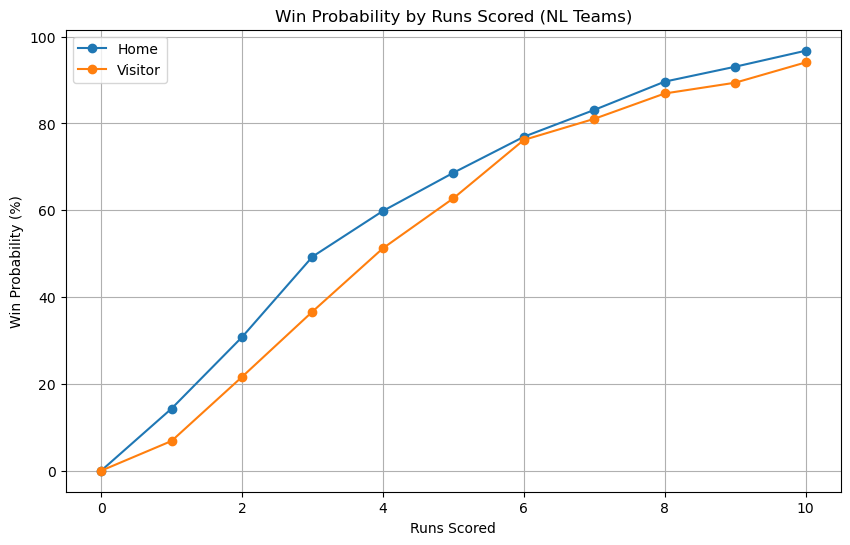

In [28]:
import matplotlib.pyplot as plt
# Plotting the win probabilities
plt.figure(figsize=(10, 6))
plt.plot(home_win_probabilities['runs'], home_win_probabilities['Win Probability'], marker='o', linestyle='-', label='Home')
plt.plot(visitor_win_probabilities['runs'], visitor_win_probabilities['Win Probability'], marker='o', linestyle='-', label='Visitor')
plt.title('Win Probability by Runs Scored (NL Teams)')
plt.xlabel('Runs Scored')
plt.ylabel('Win Probability (%)')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion

This problem set applied various statistical learning techniques to analyze baseball data. Through the use of t-tests, Monte Carlo simulations, and visualizations, we explored how different variables, such as player performance and outcomes, interact under varying conditions. Additionally, the Monte Carlo analysis provided a robust framework for assessing the variability in the data and identifying significant trends. The results demonstrated the effectiveness of combining statistical methods with data-driven decision-making, emphasizing the value of these approaches in sports analytics.